# Final Models

* Explored modeling both comments as well as post titles.
    * The post titles had a much higher classification accuracy. 
    * Surprisingly, adding feature engineering and preprocessing (lemmatizing, stemming, removing stop words, adding word counts) did not seem to help the model.
* Pretty low accuracy for the chosen subreddits (not including flairs). 
    * This is likely a case of choosing 2 very similar subreddits (formuladank is just a subreddit for formula1 memes)
* The models with flairs added far outperformed those without.

# Data imports and setup
---

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline


from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.compose import make_column_transformer

In [2]:
# Data imports 
df = pd.read_csv('../data/subreddit_comments.csv')
df_t = pd.read_csv('../data/subreddit_titles.csv')

# Best Models
---

### CV and Logistic Regression Comments with flairs

In [11]:
# X and y
cvec = CountVectorizer()
ct = make_column_transformer((cvec, 'body'), (cvec, 'author_flair_text'))
cv = ct.fit_transform(df)
df_cv = pd.DataFrame(cv.todense(), columns = ct.get_feature_names_out())

X = df_cv
y = df['subreddit']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state = 42,
                                                   stratify = y)

lr = LogisticRegression()

lr.fit(X_train, y_train)
print(f'Train: {lr.score(X_train, y_train)}')
print(f'Test: {lr.score(X_test, y_test)}')

Train: 0.9973350619418035
Test: 0.9933030892201339


              precision    recall  f1-score   support

    formula1       0.99      1.00      0.99      2282
 formuladank       1.00      0.99      0.99      2347

    accuracy                           0.99      4629
   macro avg       0.99      0.99      0.99      4629
weighted avg       0.99      0.99      0.99      4629



C:\Users\rmped\miniconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


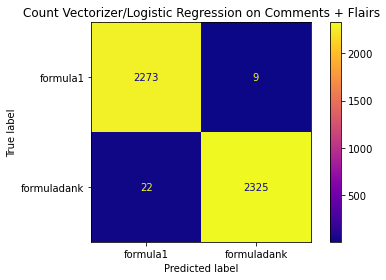

In [14]:
preds = lr.predict(X_test)
print(classification_report(y_test, preds))
plot_confusion_matrix(lr, X_test, y_test, cmap = 'plasma')
plt.title('Count Vectorizer/Logistic Regression on Comments + Flairs')
plt.tight_layout()
plt.savefig('../images/comments_flairs_cm.png');

### CV and Logistic Regression Post Titles with flairs

In [15]:
# X and y
cvec = CountVectorizer()
ct = make_column_transformer((cvec, 'title'), (cvec, 'author_flair_text'))
cv = ct.fit_transform(df_t)
df_cv = pd.DataFrame(cv.todense(), columns = ct.get_feature_names_out())

X = df_cv
y = df_t['subreddit']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state = 42,
                                                   stratify = y)

lr = LogisticRegression()


lr.fit(X_train, y_train)
print(f'Train: {lr.score(X_train, y_train)}')
print(f'Test: {lr.score(X_test, y_test)}')

Train: 0.9837115411388
Test: 0.9711899791231733


              precision    recall  f1-score   support

    formula1       0.95      0.99      0.97      1189
 formuladank       0.99      0.95      0.97      1206

    accuracy                           0.97      2395
   macro avg       0.97      0.97      0.97      2395
weighted avg       0.97      0.97      0.97      2395



C:\Users\rmped\miniconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


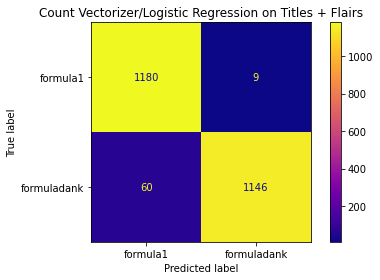

In [16]:
preds = lr.predict(X_test)
print(classification_report(y_test, preds))
plot_confusion_matrix(lr, X_test, y_test, cmap = 'plasma')
plt.title('Count Vectorizer/Logistic Regression on Titles + Flairs')
plt.tight_layout()
plt.savefig('../images/titles_flairs_cm.png');

---
# Original Models

## TF-IDF and Random Forest for post titles

In [17]:
# Train/Test split
X = df_t['title']
y = df_t['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state = 42,
                                                   stratify = y)
# Pipeline
pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_df = 0.25, max_features = 8000)),
    ('rf', RandomForestClassifier(n_estimators = 200))
])

pipe.fit(X_train, y_train)

print(f'Train: {pipe.score(X_train, y_train)}')
print(f'Test: {pipe.score(X_test, y_test)}')


Train: 0.9980509536405402
Test: 0.7716075156576201


              precision    recall  f1-score   support

    formula1       0.77      0.77      0.77      1189
 formuladank       0.77      0.78      0.77      1206

    accuracy                           0.77      2395
   macro avg       0.77      0.77      0.77      2395
weighted avg       0.77      0.77      0.77      2395



C:\Users\rmped\miniconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


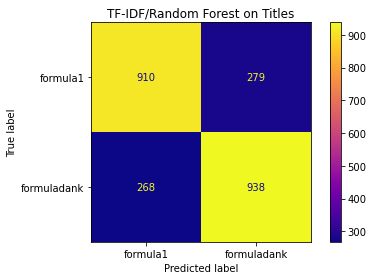

In [18]:
preds = pipe.predict(X_test)
print(classification_report(y_test, preds))
plot_confusion_matrix(pipe, X_test, y_test, cmap = 'plasma')
plt.title('TF-IDF/Random Forest on Titles')
plt.tight_layout()
plt.savefig('../images/titles_cm.png');

## TF-IDF and Logistic Regression for comments

In [19]:
# Train/Test split
X = df['body']
y = df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state = 42,
                                                   stratify = y)
# Pipeline
pipe = Pipeline([
    ('tvec', TfidfVectorizer(max_df = 0.3, max_features = 10000)),
    ('log', LogisticRegression(C = 0.75))
])

pipe.fit(X_train, y_train)

print(f'Train: {pipe.score(X_train, y_train)}')
print(f'Test: {pipe.score(X_test, y_test)}')


Train: 0.7551858254105445
Test: 0.6411751998271765


              precision    recall  f1-score   support

    formula1       0.64      0.63      0.63      2282
 formuladank       0.64      0.66      0.65      2347

    accuracy                           0.64      4629
   macro avg       0.64      0.64      0.64      4629
weighted avg       0.64      0.64      0.64      4629



C:\Users\rmped\miniconda3\envs\dsi\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


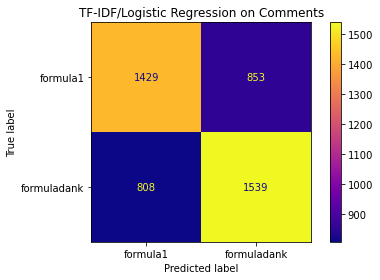

In [20]:
preds = pipe.predict(X_test)
print(classification_report(y_test, preds))
plot_confusion_matrix(pipe, X_test, y_test, cmap = 'plasma')
plt.title('TF-IDF/Logistic Regression on Comments')
plt.tight_layout()
plt.savefig('../images/comments_cm.png');